# From Sect 17-Part 2 to Sect 18 - Part 1 - Code Examples


Extracted from:
online-ds-pt-100719 study group from 
01/09/2020

## Learning Objectives

- Quickly review sets/combinations/permutations (10-15 min max)

- Revisit probability and how its calculated. (5-10 min)
- Understand conditional probability and disjointed events.
- Understand the Law of Total Probability 


## Questions:
- Breaking down interpolation - Lab (will get to next class)

In [1]:
!pip install -U fsds_100719

from math import factorial
from fsds_100719.imports import *

fsds_1007219  v0.6.4 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
seed_notebook = np.random.RandomState(123)

## PLAYLIST PERMUTATIONS (review)

- We are constructing a dinner party playlist for a gathering we are planning. 
- We asked our attendees to each provide a handful of songs they would like to be played at the dinner party.

### Playlist Permutations

In [3]:
john_recs = [['artist','track']]
john_recs.append(['Black Eyed Peas',"Let's Get it Started"])
john_recs.append(['Lady GaGa','Poker Face'])
john_recs.append(['Lady GaGa','Bad Romance'])
df_john_recs = pd.DataFrame(john_recs[1:],columns=john_recs[0])
df_john_recs['Recommended By'] = 'John'
df_john_recs.style.set_caption('JOHN')

,artist,track,Recommended By
0,Black Eyed Peas,Let's Get it Started,John
1,Lady GaGa,Poker Face,John
2,Lady GaGa,Bad Romance,John


In [4]:
anne_recs = [['artist','track']]
anne_recs.append(['Smashing Pumpkins','Tonight, Tonight'])
anne_recs.append(['Black Eyed Peas',"Let's Get it Started"])
anne_recs.append(['Green Day','Time of your Life'])

df_anne_recs = pd.DataFrame(anne_recs[1:],columns=anne_recs[0])
df_anne_recs['Recommended By'] = 'Anne'
df_anne_recs.style.set_caption('ANNE')

,artist,track,Recommended By
0,Smashing Pumpkins,"Tonight, Tonight",Anne
1,Black Eyed Peas,Let's Get it Started,Anne
2,Green Day,Time of your Life,Anne


In [5]:
joe_recs= [['artist','track']]
joe_recs.append(['Green Day','Time of your Life'])
joe_recs.append(['B-52s','Rock Lobster'])
joe_recs.append(['Lady GaGa','Poker Face'])
joe_recs.append(['John Lennon','Imagine'])

df_joe_recs = pd.DataFrame(joe_recs[1:],columns=joe_recs[0])
df_joe_recs['Recommended By'] = 'Joe'
df_joe_recs.style.set_caption('JOE')

,artist,track,Recommended By
0,Green Day,Time of your Life,Joe
1,B-52s,Rock Lobster,Joe
2,Lady GaGa,Poker Face,Joe
3,John Lennon,Imagine,Joe


In [6]:
samantha_recs = [['artist','track']]
samantha_recs.append(['Black Eyed Peas',"Let's Get it Started"])
samantha_recs.append(['Panic at the Disco','Hallelujah'])
samantha_recs.append(['Adele','Set Fire to the Rain'])

df_samantha_recs = pd.DataFrame(samantha_recs[1:],columns=samantha_recs[0])
df_samantha_recs['Recommended By'] = 'Samantha'
df_samantha_recs.style.set_caption('SAMANTHA')

,artist,track,Recommended By
0,Black Eyed Peas,Let's Get it Started,Samantha
1,Panic at the Disco,Hallelujah,Samantha
2,Adele,Set Fire to the Rain,Samantha


In [7]:
james_recs=[['artist','track']]
james_recs.append(['Eve 6',"Here's to the Night"])
james_recs.append(['Neutral Milk Hotel',"Into the Aeroplane Over the Sea"])
james_recs.append(['Rilo Kiley',"With Arms Outstretched"])
james_recs.append(['Red Hot Chili Peppers',"Otherside"])

df_james_recs = pd.DataFrame(james_recs[1:],columns=james_recs[0])
df_james_recs['Recommended By'] = 'James'
df_james_recs.style.set_caption('JAMES')

,artist,track,Recommended By
0,Eve 6,Here's to the Night,James
1,Neutral Milk Hotel,Into the Aeroplane Over the Sea,James
2,Rilo Kiley,With Arms Outstretched,James
3,Red Hot Chili Peppers,Otherside,James


In [8]:
df = pd.concat([df_john_recs,df_anne_recs,
                df_joe_recs,df_samantha_recs,
               df_james_recs],axis=0)
df

,artist,track,Recommended By
0,Black Eyed Peas,Let's Get it Started,John
1,Lady GaGa,Poker Face,John
2,Lady GaGa,Bad Romance,John
0,Smashing Pumpkins,"Tonight, Tonight",Anne
1,Black Eyed Peas,Let's Get it Started,Anne
2,Green Day,Time of your Life,Anne
0,Green Day,Time of your Life,Joe
1,B-52s,Rock Lobster,Joe
2,Lady GaGa,Poker Face,Joe
3,John Lennon,Imagine,Joe


In [9]:
## Making Sample Spaces for Tracks and artists
sTracks = set(df['track'])
sArtists = set(df['artist'])

print(len(sTracks),len(sArtists))
sTracks#,sArtists

13 12


{'Bad Romance',
 'Hallelujah',
 "Here's to the Night",
 'Imagine',
 'Into the Aeroplane Over the Sea',
 "Let's Get it Started",
 'Otherside',
 'Poker Face',
 'Rock Lobster',
 'Set Fire to the Rain',
 'Time of your Life',
 'Tonight, Tonight',
 'With Arms Outstretched'}

### Q1: How many different ways could we build a playlist using everyone's recommendations (without shuffle, no looping, and no repeated songs)?

- Q: Combination or permutation?
    -  Permutation

- Q: What formula would we use?
 $$\large P(n) = n!$$

In [10]:
from math import factorial
"{:,}".format(factorial(len(sTracks)))

'6,227,020,800'

### Q2: What if we limit the playlist to only 10 songs, without replacement?

- Q: Combination or permutation?
    - Permutation

- Q: What formula would we use?
$$ \large P_{k}^{n}= \dfrac{n!}{(n-k)!}$$ 


In [11]:
p_10_13 = factorial(13) / factorial(13-10)
"{:,}".format(p_10_13)

'1,037,836,800.0'

### Q3: what if we limit the playlist to 10 songs, WITH replacement?

- Q: Combination or permutation?
    - Permutation

- Q: What formula would we use?
$$ \large {P}_{j}^{n} = n^j $$


In [12]:
p_10_13R = 13**10
"{:,}".format(p_10_13R)

'137,858,491,849'

### Q4: what if we select 10 songs out of the total number of suggestions and allow for repitition?

In [13]:
print(df['track'].value_counts().sum())
df['track'].value_counts()

17


Let's Get it Started               3
Time of your Life                  2
Poker Face                         2
Tonight, Tonight                   1
With Arms Outstretched             1
Imagine                            1
Otherside                          1
Set Fire to the Rain               1
Rock Lobster                       1
Bad Romance                        1
Hallelujah                         1
Into the Aeroplane Over the Sea    1
Here's to the Night                1
Name: track, dtype: int64

- Q: Combination or permutation?
    - Permutation

- Q: What formula would we use?
$$\dfrac{n!}{n_1!n_2!\ldots n_j!}$$


In [14]:
p17R = factorial(17) / (factorial(3)*factorial(2)*factorial(2))
"{:,}".format(p17R)

'14,820,309,504,000.0'

### We realize we need to relax and not worry about the song-order. That's what Shuffle is for, right?

### Q5: How many playlists can we produce for an 8-track playlist from the unique suggested songs (10)?

- Q: Combination or permutation?
    - Combination

- Q: What formula would we use?
$$\large C_{k}^{n} = \displaystyle\binom{n}{k} = \dfrac{P_{k}^{n}}{k!}=\dfrac{ \dfrac{n!}{(n-k)!}}{k!} = \dfrac{n!}{(n-k)!k!}$$

In [15]:
c_8_10 = factorial(10)/ (factorial((10-8))*factorial(8))
"{:,}".format(c_8_10)

'45.0'

# Probability

### EXAMPLE PROBABILITY PROBLEMS WITH PLAYLISTS

**If we just accept everyone's suggestions (full df) and play on shuffle:**

- Q: What is the probability of hearing "Let's Get it started"?

In [16]:
df['track'].value_counts()#sum()#sort_values('track')

Let's Get it Started               3
Time of your Life                  2
Poker Face                         2
Tonight, Tonight                   1
With Arms Outstretched             1
Imagine                            1
Otherside                          1
Set Fire to the Rain               1
Rock Lobster                       1
Bad Romance                        1
Hallelujah                         1
Into the Aeroplane Over the Sea    1
Here's to the Night                1
Name: track, dtype: int64

$$P(E) = |E| / |S|  $$

In [17]:
3/17

0.17647058823529413

In [18]:
display(df['artist'].value_counts())
df['artist'].value_counts().sum()


Lady GaGa                3
Black Eyed Peas          3
Green Day                2
Adele                    1
Smashing Pumpkins        1
B-52s                    1
Rilo Kiley               1
Neutral Milk Hotel       1
Red Hot Chili Peppers    1
John Lennon              1
Eve 6                    1
Panic at the Disco       1
Name: artist, dtype: int64

17

- Q: What is the probability of playing a song by Lady GaGa?

In [19]:
3/17

0.17647058823529413

## Conditional Probability with Playlists

### Q: what is the probability of hearing a "Poker Face" given that the song is by Lady GaGa?

In [20]:
df['track'].value_counts()

Let's Get it Started               3
Time of your Life                  2
Poker Face                         2
Tonight, Tonight                   1
With Arms Outstretched             1
Imagine                            1
Otherside                          1
Set Fire to the Rain               1
Rock Lobster                       1
Bad Romance                        1
Hallelujah                         1
Into the Aeroplane Over the Sea    1
Here's to the Night                1
Name: track, dtype: int64

In [21]:
display(df.groupby('artist')['track'].count())

artist
Adele                    1
B-52s                    1
Black Eyed Peas          3
Eve 6                    1
Green Day                2
John Lennon              1
Lady GaGa                3
Neutral Milk Hotel       1
Panic at the Disco       1
Red Hot Chili Peppers    1
Rilo Kiley               1
Smashing Pumpkins        1
Name: track, dtype: int64

- What is the probability of playing Poker Face given that its a Lady GaGa song?

$$ P(PokerFace|LadyGaga)$$

In [22]:
df.groupby('artist').get_group('Lady GaGa')['track'].value_counts()

Poker Face     2
Bad Romance    1
Name: track, dtype: int64

In [23]:
# |s|=3 
# |e| = 2
2/3

0.6666666666666666

## LAW OF TOTAL PROBABILITY

### From Dinner Party Playlist to House Party Playlists

#### OUR HOUSE PARTY & LAW OF TOTAL PROB
- Our House Party is sample space S
- The 4 rooms are A1,A2,A3,A4
- B represents the probabilty of hearing a specific song or artist as you wander the house.
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-law-of-total-probability-online-ds-ft-100719/master/images/Image_55_TotProb.png">

- House party spread across 4 rooms (living room, basement, back patio, kitchen).
- Separate playlists playing at each location
- Calculate conditinal probability / total probability examples

In [24]:
# ## OLD WAY
# house_party = dict(living_room = df.sample(12).reset_index(drop=True).copy(),
#                    basement = df.sample(10).reset_index(drop=True).copy(), 
#                    back_patio = df.sample(9).reset_index(drop=True).copy(),
#                   kitchen=df.sample(8).reset_index(drop=True).copy())

# for k,v in house_party.items():
#     v['Room'] = k 
#     display(v)

In [25]:
def sample_room(df,n,seed=seed_notebook):
    return df.sample(n, random_state=seed).reset_index(drop=True).copy()

sample_params = dict(living_room = 12,
                    basement=10,
                    back_patio = 9,
                    kitchen=8)
house_party={}
for room,n_samples in sample_params.items():
    house_party[room] = sample_room(df,n_samples)

for k,v in house_party.items():
    v['Room'] = k 
    display(v)

,artist,track,Recommended By,Room
0,Black Eyed Peas,Let's Get it Started,Anne,living_room
1,John Lennon,Imagine,Joe,living_room
2,Red Hot Chili Peppers,Otherside,James,living_room
3,Lady GaGa,Poker Face,Joe,living_room
4,Green Day,Time of your Life,Anne,living_room
5,B-52s,Rock Lobster,Joe,living_room
6,Black Eyed Peas,Let's Get it Started,John,living_room
7,Black Eyed Peas,Let's Get it Started,Samantha,living_room
8,Panic at the Disco,Hallelujah,Samantha,living_room
9,Smashing Pumpkins,"Tonight, Tonight",Anne,living_room


,artist,track,Recommended By,Room
0,Lady GaGa,Poker Face,Joe,basement
1,Black Eyed Peas,Let's Get it Started,Samantha,basement
2,Green Day,Time of your Life,Anne,basement
3,Green Day,Time of your Life,Joe,basement
4,Red Hot Chili Peppers,Otherside,James,basement
5,Lady GaGa,Bad Romance,John,basement
6,Neutral Milk Hotel,Into the Aeroplane Over the Sea,James,basement
7,B-52s,Rock Lobster,Joe,basement
8,Lady GaGa,Poker Face,John,basement
9,Adele,Set Fire to the Rain,Samantha,basement


,artist,track,Recommended By,Room
0,Red Hot Chili Peppers,Otherside,James,back_patio
1,Panic at the Disco,Hallelujah,Samantha,back_patio
2,Neutral Milk Hotel,Into the Aeroplane Over the Sea,James,back_patio
3,Adele,Set Fire to the Rain,Samantha,back_patio
4,Lady GaGa,Bad Romance,John,back_patio
5,Black Eyed Peas,Let's Get it Started,Samantha,back_patio
6,Green Day,Time of your Life,Anne,back_patio
7,Lady GaGa,Poker Face,John,back_patio
8,Green Day,Time of your Life,Joe,back_patio


,artist,track,Recommended By,Room
0,Lady GaGa,Poker Face,John,kitchen
1,Neutral Milk Hotel,Into the Aeroplane Over the Sea,James,kitchen
2,Eve 6,Here's to the Night,James,kitchen
3,Lady GaGa,Poker Face,Joe,kitchen
4,B-52s,Rock Lobster,Joe,kitchen
5,John Lennon,Imagine,Joe,kitchen
6,Red Hot Chili Peppers,Otherside,James,kitchen
7,Black Eyed Peas,Let's Get it Started,Anne,kitchen


In [26]:
df_house_party = pd.concat(house_party.values(),axis=0)
df_house_party.reset_index(inplace=True,drop=True)

for col in ['track','artist','Recommended By']:
    print(f"\n\n[i] Col = {col}:")
    display(df_house_party[col].value_counts())



[i] Col = track:


Poker Face                         7
Let's Get it Started               6
Time of your Life                  6
Otherside                          4
Into the Aeroplane Over the Sea    3
Rock Lobster                       3
Bad Romance                        2
Imagine                            2
Set Fire to the Rain               2
Hallelujah                         2
Tonight, Tonight                   1
Here's to the Night                1
Name: track, dtype: int64



[i] Col = artist:


Lady GaGa                9
Green Day                6
Black Eyed Peas          6
Red Hot Chili Peppers    4
B-52s                    3
Neutral Milk Hotel       3
Adele                    2
John Lennon              2
Panic at the Disco       2
Smashing Pumpkins        1
Eve 6                    1
Name: artist, dtype: int64



[i] Col = Recommended By:


Joe         11
James        8
Samantha     7
John         7
Anne         6
Name: Recommended By, dtype: int64

In [27]:
res = house_party['living_room']['track'].value_counts()
res.sum()

12

In [28]:
rooms_list= list(house_party.keys())

def get_room_counts(room='livng_room', 
                    column='artist', return_res=False,verbose=True):
    """Get value counts from house_party dict for the room and specified column."""
    room_counts = house_party[room][column].value_counts()
    
    if verbose: 
        display(room_counts)
        print('Total Tracks: ',room_counts.sum())
    
    if return_res:
        return room_counts
    
def get_room_prob(room='living_room', column='artist',target='Green Day', verbose=True):
    room_counts = get_room_counts(room, column, True,False)
    
    if target not in room_counts.index:
        rm_cnt=0
    else:
        rm_cnt= room_counts.loc[target]

    cnt_sum = np.sum(room_counts)#.sum()
    prob = np.round(rm_cnt/cnt_sum,3)
        
    if verbose: print(f"[i] P({target}|{room}) \t= {rm_cnt}/{cnt_sum} \t= {np.float(prob):{'.2f'}}")
              
    return prob#room_counts.loc[target]/room_counts.sum()
    

### Q1: What is the probability of hearing a Green Day song at the house party at any given moment?

$$P(A)= \sum_i P(A \cap B_i)= \sum_i P(A \mid B_i)P(B_i)$$


$$ P(GD)=\sum_i P(GD \mid Room_i)P(Room_i)$$

####  To Calculate $P(GD)$ =

$P(GD|Room1)\times \frac{1}{4} + P(GD|Room2)\times \frac{1}{4} + P(GD|Room3)\times \frac{1}{4} + P(GD|Room4)\times \frac{1}{4} $





In [29]:
rooms_list

['living_room', 'basement', 'back_patio', 'kitchen']

In [30]:
# p_gd_given_rm1 
# val_counts = get_room_counts(room=rooms_list[0],column='artist',return_res=True)
p_gd = 0
for room in rooms_list:
    try:
        prob_rm = get_room_prob(room=room,target='Green Day',column='artist')
    except:
        prob_rm=0
    p_gd += (prob_rm)*(1/4)

print(f"P(GreenDay)= {np.round(p_gd,3)}")

[i] P(Green Day|living_room) 	= 2/12 	= 0.17
[i] P(Green Day|basement) 	= 2/10 	= 0.20
[i] P(Green Day|back_patio) 	= 2/9 	= 0.22
[i] P(Green Day|kitchen) 	= 0/8 	= 0.00
P(GreenDay)= 0.147


In [31]:
# p_gd = 0
# for room in rooms_list:
#     prob_rm = get_room_prob(room=room,target='Green Day',column='artist')
#     p_gd += (prob_rm)*(1/4)
# p_gd

### What if we have unequal probabilties for being in each room?

- Living room and basement are kind of bland (prob of being in either room is .15. 
- Back patio has a nice fire. (prob being in room=0.3)
- Kitchen has the alcohol.  (prob being in room=0.4)

In [32]:
rooms_probs = dict(zip(rooms_list,[0.15,0.15,0.3,0.4]))
rooms_probs

{'living_room': 0.15, 'basement': 0.15, 'back_patio': 0.3, 'kitchen': 0.4}

In [33]:
np.sum(list(rooms_probs.values()))

1.0

In [34]:
p_gd = 0
for room,room_prob in rooms_probs.items():
    prob_rm = get_room_prob(room=room,target='Green Day',column='artist')
    p_gd += (prob_rm)*(room_prob)
p_gd

[i] P(Green Day|living_room) 	= 2/12 	= 0.17
[i] P(Green Day|basement) 	= 2/10 	= 0.20
[i] P(Green Day|back_patio) 	= 2/9 	= 0.22
[i] P(Green Day|kitchen) 	= 0/8 	= 0.00


0.12165

### Q: what is the probability of hearing a song recommend by Anne?

$$ P(AnneRec)=\sum_i P(AnneRec \mid Room_i)P(Room_i)$$


In [35]:
p_anne = 0

for room,room_prob in rooms_probs.items():
    prob_rm = get_room_prob(room=room, target='Anne',column='Recommended By')
    p_anne += (prob_rm * room_prob)
    
p_anne

[i] P(Anne|living_room) 	= 3/12 	= 0.25
[i] P(Anne|basement) 	= 1/10 	= 0.10
[i] P(Anne|back_patio) 	= 1/9 	= 0.11
[i] P(Anne|kitchen) 	= 1/8 	= 0.12


0.13579999999999998

In [36]:
people = df["Recommended By"].unique()
people

array(['John', 'Anne', 'Joe', 'Samantha', 'James'], dtype=object)

In [37]:
def loop_people(people):
    p_total = []
    for person in people:
        p_john = 0

        for room,room_prob in rooms_probs.items():
            try:
                prob_rm = get_room_prob(room=room, target=person,column='Recommended By')
                
            except:
                prob_rm=0
            p_john += (prob_rm * room_prob)
           
            
        p_total.append(p_john)

#     assert np.sum(p_total)==1.0
    print(f"p_total={np.sum(p_total)}")
    print(f"Prob for songs by {person}= {p_john}",end='\n\n')


In [38]:
tot = loop_people(people)


[i] P(John|living_room) 	= 2/12 	= 0.17
[i] P(John|basement) 	= 2/10 	= 0.20
[i] P(John|back_patio) 	= 2/9 	= 0.22
[i] P(John|kitchen) 	= 1/8 	= 0.12
[i] P(Anne|living_room) 	= 3/12 	= 0.25
[i] P(Anne|basement) 	= 1/10 	= 0.10
[i] P(Anne|back_patio) 	= 1/9 	= 0.11
[i] P(Anne|kitchen) 	= 1/8 	= 0.12
[i] P(Joe|living_room) 	= 4/12 	= 0.33
[i] P(Joe|basement) 	= 3/10 	= 0.30
[i] P(Joe|back_patio) 	= 1/9 	= 0.11
[i] P(Joe|kitchen) 	= 3/8 	= 0.38
[i] P(Samantha|living_room) 	= 2/12 	= 0.17
[i] P(Samantha|basement) 	= 2/10 	= 0.20
[i] P(Samantha|back_patio) 	= 3/9 	= 0.33
[i] P(Samantha|kitchen) 	= 0/8 	= 0.00
[i] P(James|living_room) 	= 1/12 	= 0.08
[i] P(James|basement) 	= 2/10 	= 0.20
[i] P(James|back_patio) 	= 2/9 	= 0.22
[i] P(James|kitchen) 	= 3/8 	= 0.38
p_total=0.9997
Prob for songs by James= 0.25905



# Intro to Section 18 - Statistical Distributions

- Distributions are directly related to probability, which is a critical concept we will explore more with Hypothesis Testing in Module 3.

## Probability Mass Function (AKA Probability Distribution Function)

## Class Code

ORIGINAL CODE FROM CLASS:

```python
from collections import Counter

def coin_toss(n_flips=10,outcomes=None,verbose=True,ret_outcomes=True):
    if outcomes is None:
        outcomes = []
    
    for toss in range(n_flips):
        result = 'H' if np.random.random() >0.5 else 'T'
        outcomes.append(result)
        
        if verbose: print(f"Toss {toss}: \t{result}")
            
#     if ret_outcomes:
    return outcomes
#     else:        
#         counter = Counter(outcomes)
#         return counter

#cell
outcomes = coin_toss(n_flips=5)
outcomes

#cell
counter= Counter(outcomes)
counter

#cell
def plot_pmf_vs_hist(counter):
    if isinstance(counter,list):
        from collections import Counter
        counter = Counter(counter)

    fig,ax=plt.subplots(ncols=2,figsize=(12,4))
    pmf = [] 

    for k,v in counter.items():
        pmf.append(round(v/len(outcomes),2))


    ax[0].bar(counter.keys(),pmf)
    ax[0].set(title=f'PMF (sum={np.sum(pmf)})',ylabel='Frequency',xlabel='Outcomes')
    
    ax[1].hist(outcomes)#counter.keys(),counter.values())
    ax[1].set(title=f'Histogram (sum={np.sum(list(counter.values()))})',ylabel='Counts',xlabel='Outcomes')
    plt.tight_layout()
    return fig,ax

#cell
plot_pmf_vs_hist(counter)

#cell
outcomes = coin_toss(n_flips=12,outcomes=outcomes)
plot_pmf_vs_hist(outcomes)

#cell 
outcomes = coin_toss(n_flips=21,outcomes=outcomes)
plot_pmf_vs_hist(outcomes)

#cell
outcomes = coin_toss(n_flips=20,outcomes=outcomes)
plot_pmf_vs_hist(outcomes)

#cell
outcomes = coin_toss(n_flips=200,outcomes=outcomes)
plot_pmf_vs_hist(outcomes)

```

## Class Code Applied

In [39]:
from collections import Counter

def coin_toss(n_flips=10,outcomes=None,verbose=True,ret_outcomes=True):
    if outcomes is None:
        outcomes = []
    
    for toss in range(n_flips):
        result = 'H' if np.random.random() >0.5 else 'T'
        outcomes.append(result)
        
        if verbose: print(f"Toss {toss}: \t{result}")
            
    return outcomes

In [40]:
def plot_pmf_vs_hist(counter):
    
    if isinstance(counter,list):
        from collections import Counter
        counter = Counter(counter)

    fig,ax=plt.subplots(ncols=2,figsize=(12,4))
    pmf = [] 

    for k,v in counter.items():
        pmf.append(round(v/len(outcomes),3))


    ax[0].bar(counter.keys(),pmf)
    ax[0].set(title=f'PMF (sum={np.sum(pmf)})',ylabel='Frequency',xlabel='Outcomes')
    
    ax[1].hist(outcomes)#counter.keys(),counter.values())
    ax[1].set(title=f'Histogram (sum={np.sum(list(counter.values()))})',ylabel='Counts',xlabel='Outcomes')
    plt.tight_layout()
    return fig,ax

In [41]:
## Get outcomes
outcomes = coin_toss(n_flips=5)
outcomes

Toss 0: 	T
Toss 1: 	H
Toss 2: 	H
Toss 3: 	T
Toss 4: 	T


['T', 'H', 'H', 'T', 'T']

In [42]:
##Make a counter
counter= Counter(outcomes)
counter

Counter({'T': 3, 'H': 2})

(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22a8cb38>,
       dtype=object))

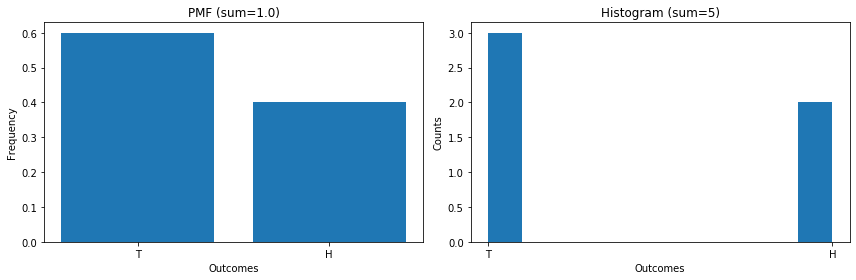

In [43]:
# Plot outcomes
plot_pmf_vs_hist(counter)

DEMO: SEED 123
Toss 0: 	H
Toss 1: 	T
Toss 2: 	T
Toss 3: 	H
Toss 4: 	H
Toss 5: 	T
Toss 6: 	H
Toss 7: 	H
['H', 'T', 'T', 'H', 'H', 'T', 'H', 'H']


(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22e0e080>,
       dtype=object))

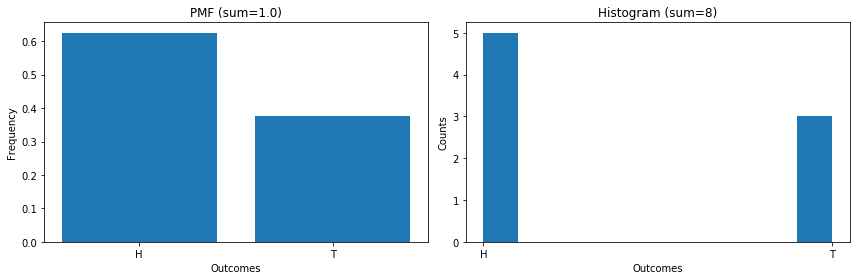

In [44]:
#cell
seed=123
np.random.seed(seed)
print(f'DEMO: SEED {seed}')
#cell
outcomes = coin_toss(n_flips=8)
print(outcomes)
plot_pmf_vs_hist(outcomes)

# outcomes = coin_toss(n_flips=12,outcomes=outcomes)
# plot_pmf_vs_hist(outcomes)

Toss 0: 	T
Toss 1: 	T
Toss 2: 	T
Toss 3: 	H
Toss 4: 	T
Toss 5: 	T
Toss 6: 	T
Toss 7: 	H
Toss 8: 	T
Toss 9: 	T
Toss 10: 	H
Toss 11: 	H
Toss 12: 	H
Toss 13: 	H
Toss 14: 	H
Toss 15: 	H
Toss 16: 	H
Toss 17: 	T
Toss 18: 	T
Toss 19: 	T
Toss 20: 	T


(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22f7ed68>,
       dtype=object))

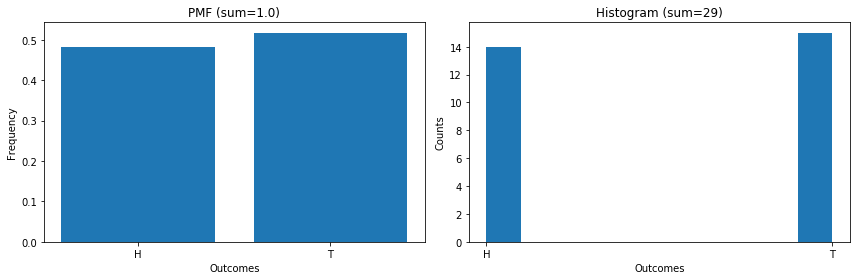

In [45]:
#cell 
outcomes = coin_toss(n_flips=21,outcomes=outcomes)
plot_pmf_vs_hist(outcomes)

Toss 0: 	H
Toss 1: 	T
Toss 2: 	T
Toss 3: 	T
Toss 4: 	T
Toss 5: 	T
Toss 6: 	T
Toss 7: 	T
Toss 8: 	H
Toss 9: 	H
Toss 10: 	H
Toss 11: 	H
Toss 12: 	T
Toss 13: 	T
Toss 14: 	T
Toss 15: 	H
Toss 16: 	T
Toss 17: 	T
Toss 18: 	H
Toss 19: 	H


(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22fce4a8>,
       dtype=object))

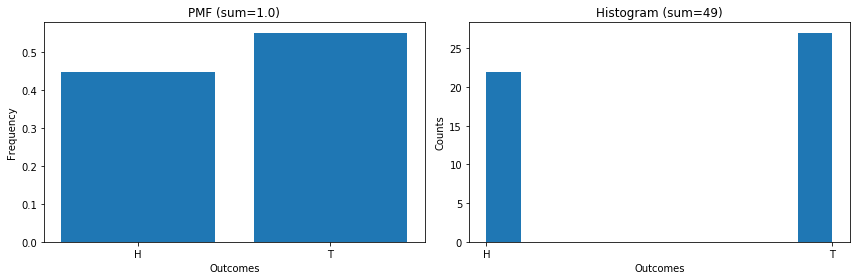

In [46]:
#cell
outcomes = coin_toss(n_flips=20,outcomes=outcomes)
plot_pmf_vs_hist(outcomes)

Toss 0: 	H
Toss 1: 	T
Toss 2: 	H
Toss 3: 	H
Toss 4: 	H
Toss 5: 	T
Toss 6: 	T
Toss 7: 	T
Toss 8: 	H
Toss 9: 	H
Toss 10: 	H
Toss 11: 	H
Toss 12: 	H
Toss 13: 	H
Toss 14: 	H
Toss 15: 	H
Toss 16: 	T
Toss 17: 	H
Toss 18: 	T
Toss 19: 	T
Toss 20: 	H
Toss 21: 	T
Toss 22: 	H
Toss 23: 	H
Toss 24: 	H
Toss 25: 	T
Toss 26: 	H
Toss 27: 	H
Toss 28: 	T
Toss 29: 	T
Toss 30: 	H
Toss 31: 	T
Toss 32: 	H
Toss 33: 	H
Toss 34: 	T
Toss 35: 	H
Toss 36: 	H
Toss 37: 	T
Toss 38: 	T
Toss 39: 	T
Toss 40: 	T
Toss 41: 	H
Toss 42: 	H
Toss 43: 	T
Toss 44: 	H
Toss 45: 	H
Toss 46: 	H
Toss 47: 	T
Toss 48: 	T
Toss 49: 	T
Toss 50: 	T
Toss 51: 	H
Toss 52: 	H
Toss 53: 	T
Toss 54: 	T
Toss 55: 	T
Toss 56: 	H
Toss 57: 	H
Toss 58: 	H
Toss 59: 	H
Toss 60: 	T
Toss 61: 	T
Toss 62: 	T
Toss 63: 	T
Toss 64: 	H
Toss 65: 	T
Toss 66: 	H
Toss 67: 	H
Toss 68: 	H
Toss 69: 	T
Toss 70: 	H
Toss 71: 	H
Toss 72: 	T
Toss 73: 	T
Toss 74: 	H
Toss 75: 	H
Toss 76: 	H
Toss 77: 	T
Toss 78: 	H
Toss 79: 	H
Toss 80: 	T
Toss 81: 	H
Toss 82: 	T
Toss 83: 	H
To

(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a23320b70>,
       dtype=object))

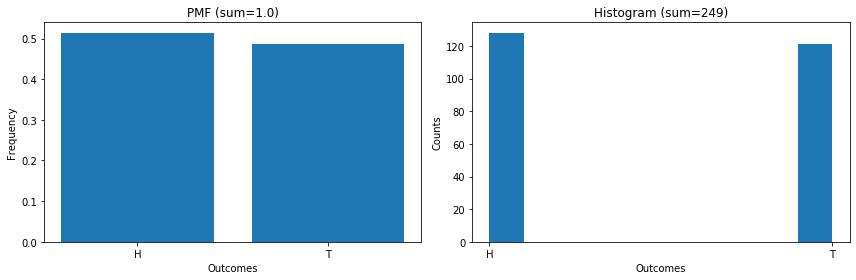

In [47]:
#cell
outcomes = coin_toss(n_flips=200,outcomes=outcomes)
plot_pmf_vs_hist(outcomes)


## Updated Code

In [48]:
stop

NameError: name 'stop' is not defined

### Flipping a coin

In [50]:
fs.ds.inspect_variables(locals())
# del outcomes,v

,type,size
variable,,
df_house_party,DataFrame,10639
df,DataFrame,3618
v,DataFrame,2275
outcomes,list,2216
Counter,class,1056
df_james_recs,DataFrame,991
df_joe_recs,DataFrame,928
df_samantha_recs,DataFrame,777
df_anne_recs,DataFrame,771


#[i] set `print_names=True` for var names to copy/paste.
---------------------------------------------


### ~~Maybe make new coin toss that uses closures?~~

In [ ]:
# from collections import Counter

# def coin_toss_new(n_flips=10,outcomes=None,verbose=True,
#               plot_outcomes=True):
#     from functools import wraps
#     if outcomes is None:
#         outcomes = []    
#     @wraps(coin_toss_new)    
#     def inner(*args,**kwargs):

#         for toss in range(n_flips):
#             result = 'H' if np.random.random() >0.5 else 'T'
#             outcomes.append(result)

#             if verbose: print(f"Toss {toss}: \t{result}")

#         if plot_outcomes:
#             fig,ax = plot_outcomes(outcomes)
#         return outcomes
#     return inner
# coin = coin_toss_new(5})
    
#     #     else:        
#     #         counter = Counter(outcomes)
#     #         return counter

## Make new plot_outcomes which uses only local vars

In [51]:
# from collections import Counter

# def coin_toss_new(n_flips=10,outcomes=None,verbose=True,
#               plot_outcomes=True):
#     if outcomes is None:
#         outcomes = []
    
#     for toss in range(n_flips):
#         result = 'H' if np.random.random() >0.5 else 'T'
#         outcomes.append(result)
        
#         if verbose: print(f"Toss {toss}: \t{result}")
            
#     if plot_outcomes:
#         fig,ax = plot_outcomes(outcomes)
#     return outcomes
# #     else:        
# #         counter = Counter(outcomes)
# #         return counter

In [52]:
# def plot_outcomes(outcomes):
    
#     from collections import Counter
#     if isinstance(outcomes,list):
#         from collections import Counter
#         counter = Counter(outcomes)
        
#     if isinstance(outcomes,Counter):
#         counter = outcomes.copy()
    
#     OUTCOMES = list(counter.elements())
    
#     fig,ax=plt.subplots(ncols=2,figsize=(12,4))
    
#     pmf = [] 
#     for k,v in counter.items():
#         pmf.append(round(v/len(outcomes),3))


#     ax[0].bar(counter.keys(),pmf)
#     ax[0].set(title=f'PMF (sum={np.sum(pmf)})',ylabel='Frequency',xlabel='Outcomes')
    
#     #try:
#     ax[1].hist(OUTCOMES)#counter.keys(),counter.values())
#     ax[1].set(title=f'Histogram (sum={sum(counter.values())})',ylabel='Counts',xlabel='Outcomes')
# #     except Exception as e:
# #         print(type(OUTCOMES),OUTCOMES)
# #         raise e
        
    
#     plt.tight_layout()
#     plt.show()
#     return fig,ax

In [53]:
# len(list(counter.elements()))
# sum(counter.values())

In [54]:
# outcomes=[]
# # outcomes = coin_toss_new(n_flips=5,outcomes=outcomes)
# outcomes = coin_toss(n_flips=10, outcomes=outcomes)
# plot_outcomes(outcomes)

In [ ]:
# def plot_pmf_vs_hist(counter):
#     if isinstance(counter,list):
#         from collections import Counter
#         counter = Counter(counter)

#     fig,ax=plt.subplots(ncols=2,figsize=(12,4))
    
#     outcomes =list(counter.elements())

#     pmf = [] 
#     for k,v in counter.items():
#         pmf.append(round(v/len(outcomes),3))


#     ax[0].bar(counter.keys(),pmf)
#     ax[0].set(title=f'PMF (sum={np.sum(pmf)})',ylabel='Frequency',xlabel='Outcomes')
    
    
#     ax[1].hist(list(counter.elements()))#counter.keys(),counter.values())
#     ax[1].set(title=f'Histogram (sum={np.sum(list(counter.values()))})',ylabel='Counts',xlabel='Outcomes')
    
#     plt.tight_layout()
#     plt.show()
#     return fig,ax

In [ ]:
outcomes=[]
outcomes = coin_toss_new(n_flips=5,outcomes=outcomes,plot_outcomes=False)

In [ ]:
counter= Counter(outcomes)
counter

In [ ]:
plot_pmf_vs_hist(counter), plot_pmf_vs_hist(outcomes)

In [ ]:
type(outcomes)

In [ ]:
outcomes = coin_toss(n_flips=12,outcomes=outcomes)
plot_pmf_vs_hist(outcomes)

In [ ]:
# outcomes = coin_toss(n_flips=21,outcomes=outcomes)
# plot_pmf_vs_hist(outcomes)

In [ ]:
# outcomes = coin_toss(n_flips=20,outcomes=outcomes)
# plot_pmf_vs_hist(outcomes)

In [ ]:
outcomes = coin_toss(n_flips=200,outcomes=outcomes)
plot_pmf_vs_hist(outcomes)

In [ ]:
outcomes[:20]

# For Next Time:
- Get vocab straight for dists
- Interpolation